In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.utils

from mpl_toolkits.basemap import Basemap
from pylab import rcParams

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

%matplotlib inline

url = 'ftp://client_climate@ftp.tor.ec.gc.ca/Pub/Get_More_Data_Plus_de_donnees/Station%20Inventory%20EN.csv'
master = pd.read_csv(url, skiprows=3, index_col=0)
master = master[(master['Latitude (Decimal Degrees)'] != 0.0) & (master['Longitude (Decimal Degrees)'] != 0.0)]
master = master[master['Latitude (Decimal Degrees)'] < 85]

In [2]:
master.head(10)

,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
Name,,,,,,,,,,,,,,,,,,
ACTIVE PASS,BRITISH COLUMBIA,1010066,14,NaN,NaN,48.87,-123.28,485200000.0,-1.231700e+09,4.0,1984.0,1996.0,NaN,NaN,1984.0,1996.0,1984.0,1996.0
ALBERT HEAD,BRITISH COLUMBIA,1010235,15,NaN,NaN,48.40,-123.48,482400000.0,-1.232900e+09,17.0,1971.0,1995.0,NaN,NaN,1971.0,1995.0,1971.0,1995.0
BAMBERTON OCEAN CEMENT,BRITISH COLUMBIA,1010595,16,NaN,NaN,48.58,-123.52,483500000.0,-1.233100e+09,85.3,1961.0,1980.0,NaN,NaN,1961.0,1980.0,1961.0,1980.0
BEAR CREEK,BRITISH COLUMBIA,1010720,17,NaN,NaN,48.50,-124.00,483000000.0,-1.240000e+09,350.5,1910.0,1971.0,NaN,NaN,1910.0,1971.0,1910.0,1971.0
BEAVER LAKE,BRITISH COLUMBIA,1010774,18,NaN,NaN,48.50,-123.35,483000000.0,-1.232100e+09,61.0,1894.0,1952.0,NaN,NaN,1894.0,1952.0,1894.0,1952.0
BECHER BAY,BRITISH COLUMBIA,1010780,19,NaN,NaN,48.33,-123.63,482000000.0,-1.233800e+09,12.2,1956.0,1966.0,NaN,NaN,1956.0,1966.0,1956.0,1966.0
BRENTWOOD BAY 2,BRITISH COLUMBIA,1010960,20,NaN,NaN,48.60,-123.47,483600000.0,-1.232800e+09,38.0,1987.0,1997.0,NaN,NaN,1987.0,1997.0,1987.0,1997.0
BRENTWOOD CLARKE ROAD,BRITISH COLUMBIA,1010961,21,NaN,NaN,48.57,-123.45,483400000.0,-1.232700e+09,30.5,1972.0,1980.0,NaN,NaN,1972.0,1980.0,1972.0,1980.0
BRENTWOOD W SAANICH RD,BRITISH COLUMBIA,1010965,22,NaN,NaN,48.57,-123.43,483400000.0,-1.232600e+09,91.4,1960.0,1970.0,NaN,NaN,1960.0,1970.0,1960.0,1970.0


/Users/Arthas/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Arthas/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


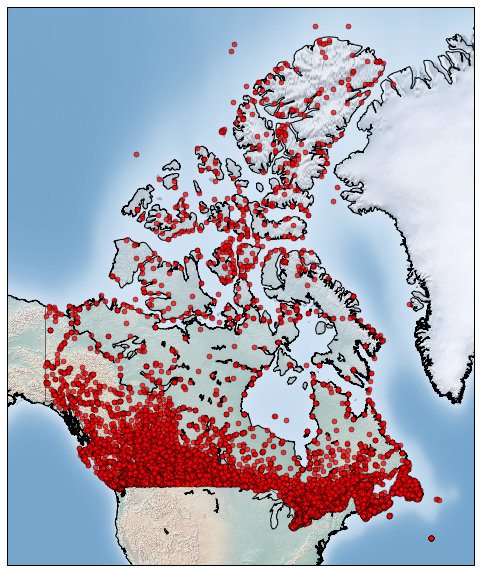

In [3]:
df = master[['Province', 'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)']]
df.columns = ['Province', 'Latitude', 'Longitude']

rcParams['figure.figsize'] = (14,10)

my_map = Basemap(
                projection='merc',
                resolution = 'h',
                area_thresh = 1000.0,
                llcrnrlon=-150,
                llcrnrlat=35,
                urcrnrlon=-40,
                urcrnrlat=84
                )

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

xs, ys = my_map(np.asarray(df.Longitude), np.asarray(df.Latitude))
df['xm'] = xs.tolist()
df['ym'] = ys.tolist()

for index, row in df.iterrows():
    my_map.plot(row.xm,
                row.ym,
                markerfacecolor=([1,0,0]),
                marker='o',
                markersize= 5,
                alpha = 0.75)

plt.show()

/Users/Arthas/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Arthas/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


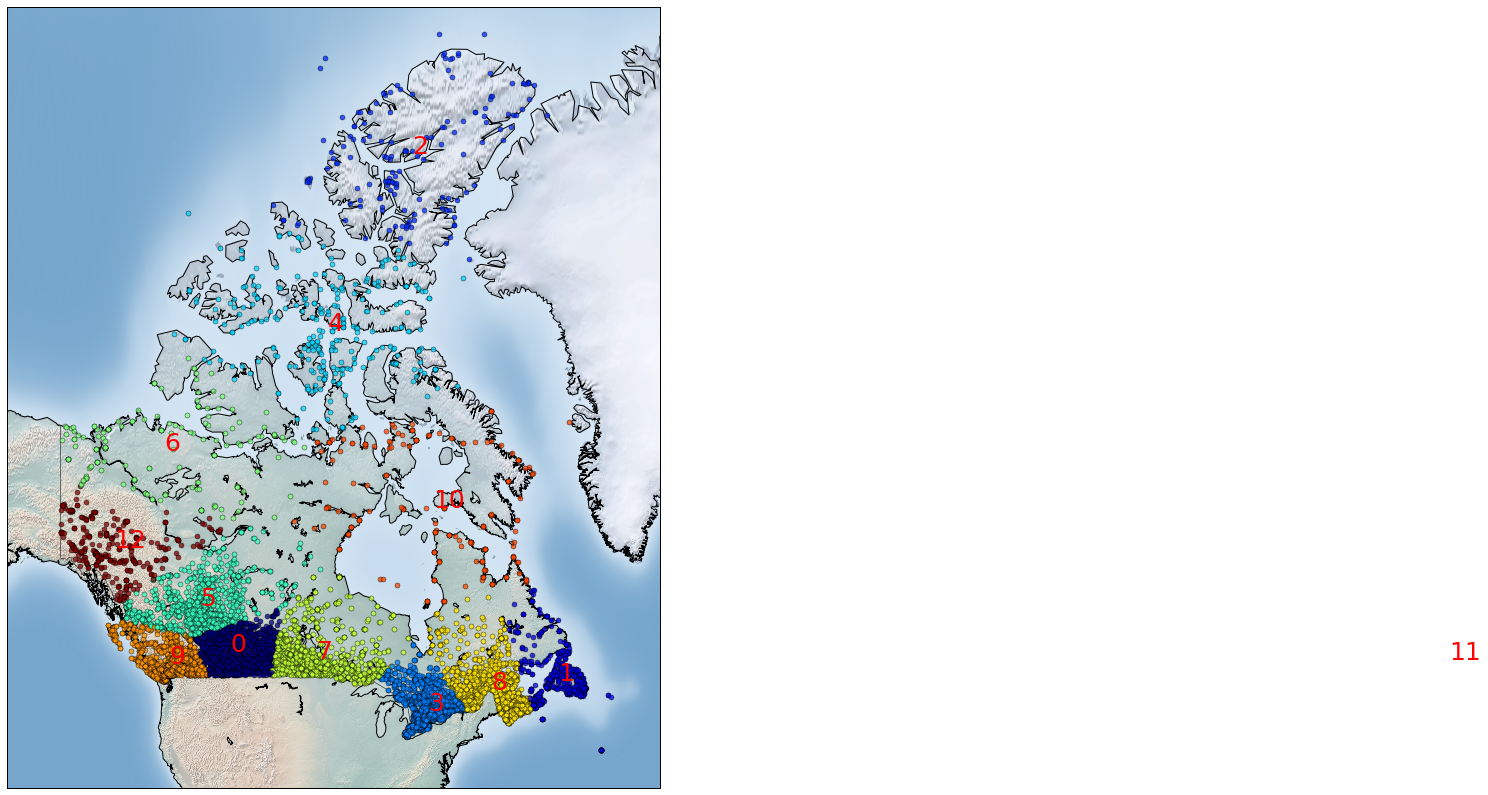

In [4]:
clusterNum = 13
sklearn.utils.check_random_state(1000)
df = df.dropna(axis='rows')
Clus_dataSet = StandardScaler().fit_transform(df[['xm', 'ym']].as_matrix())
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
df['labels'] = labels
rcParams['figure.figsize'] = (20,14)

my_map = Basemap(
                projection='merc',
                resolution = 'l',
                area_thresh = 1000.0,
                llcrnrlon=-150,
                llcrnrlat=35,
                urcrnrlon=-40,
                urcrnrlat=84
                )

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Create a colour mapping
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization
for index, row in df.iterrows():
    my_map.plot(row.xm,
                row.ym,
                markerfacecolor=colors[np.float(row['labels'])],
                marker='o',
                markersize= 5,
                alpha = 0.75)

for i in range(clusterNum): 
    cluster = df[["Province","xm","ym", "labels"]][df['labels']==i]
    cenx = np.mean(cluster.xm) 
    ceny = np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    
plt.show()

/Users/Arthas/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Arthas/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


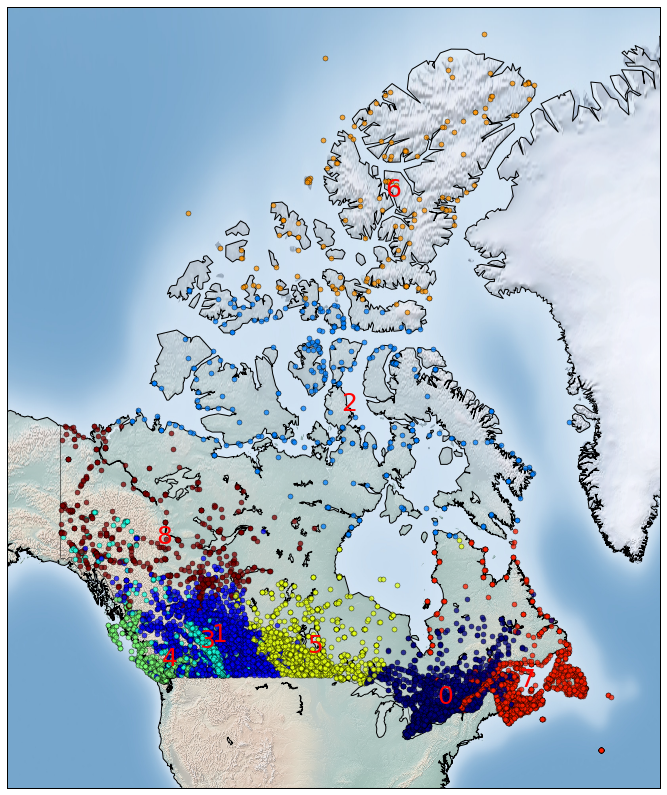

In [5]:
df = master[['Province', 'Latitude (Decimal Degrees)', 'Longitude (Decimal Degrees)', 'Elevation (m)']]
df.columns = ['Province', 'Latitude', 'Longitude', 'Elevation']
df = df.dropna(axis='rows')
#normalize the elevation
df['Elevation'] = (df['Elevation'] - df['Elevation'].mean()) / (df['Elevation'].max() - df['Elevation'].min())

xs, ys = my_map(np.asarray(df.Longitude), np.asarray(df.Latitude))
df['xm'] = xs.tolist()
df['ym'] = ys.tolist()

#ten regions
clusterNum = 9
sklearn.utils.check_random_state(1000)
df = df.dropna(axis='rows')
Clus_dataSet = StandardScaler().fit_transform(df[['xm', 'ym', 'Elevation']].as_matrix())
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
df['labels'] = labels
rcParams['figure.figsize'] = (20,14)

my_map = Basemap(
                projection='merc',
                resolution = 'l',
                area_thresh = 1000.0,
                llcrnrlon=-150,
                llcrnrlat=35,
                urcrnrlon=-40,
                urcrnrlat=84
                )

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for index, row in df.iterrows():
    my_map.plot(row.xm,
                row.ym,
                markerfacecolor=colors[np.float(row['labels'])],
                marker='o',
                markersize= 5,
                alpha = 0.75)

for i in range(clusterNum): 
    cluster = df[["Province","xm","ym","Elevation", "labels"]][df['labels']==i]
    cenx = np.mean(cluster.xm) 
    ceny = np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    
plt.show()